In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
universal_path="C:/Users/umber/Desktop/Assignment Data 2023-2024/"

#anni covid-10 2020-2021-2022

In [2]:
player_valuations_df=pd.read_csv(universal_path+'player_valuations.csv')
game_events_df=pd.read_csv(universal_path+'game_events.csv')
games_df=pd.read_csv(universal_path+'games.csv')
players_df=pd.read_csv(universal_path+'players.csv')


Text(0.5, 1.0, "media valore dei giocatori in correlazione all'anno")

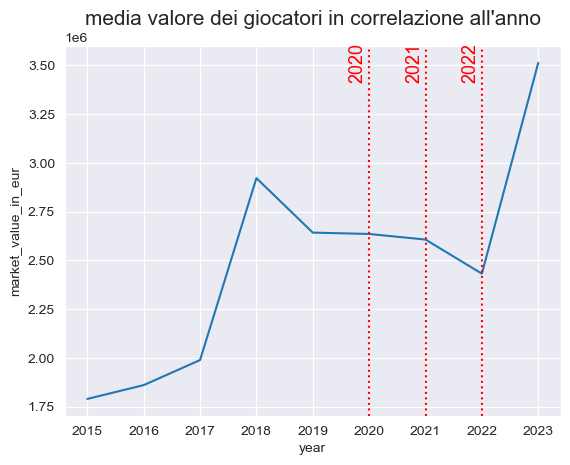

In [3]:
from matplotlib import ticker

player_valuations_df['date']=pd.to_datetime(player_valuations_df['date'])
player_valuations_df['year'] = player_valuations_df['date'].dt.year
filtered_player_valuations=player_valuations_df[player_valuations_df['year']>=2015]
avg_player_valuations=filtered_player_valuations.groupby('year')['market_value_in_eur'].mean().reset_index()
sns.lineplot(data=avg_player_valuations,x='year', y = 'market_value_in_eur')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
covid_years = [2020, 2021, 2022]
for year in covid_years:
    plt.axvline(x=year, color='red', linestyle=':')
    plt.text(year-0.2, avg_player_valuations['market_value_in_eur'].max(), str(year), color='red', ha='center',va='center',rotation=90, fontsize=13)

plt.title('media valore dei giocatori in correlazione all\'anno', fontsize=15)